## **Torre Talent Insight Dashboard**

## 🧠 **Introduction**  
Torre Talent Insight Dashboard is a simple yet powerful tool built to display candidate insights in real-time using Torre's publicly available API. The dashboard allows recruiters or hiring managers to search for professionals by name or keyword, view key profile details such as username and professional title, and explore their skill sets in depth using Torre's genome biodata. The dashboard also highlights skill trends across search results and offers a basis for expanding into recommendations, job matching and team planning tools.

## 💡 **Why It's Useful?**  
My principle for building this project is “Simple but very useful.”

This dashboard turns the power of raw APIs into something intuitive and usable. By combining search, skills insights, and visualizations into a clean Colab interface, the project becomes:

🔍 A lightweight team search tool  
📊 A visual skill distribution analyzer  
🧭 A starting point for a recommendation system or talent matching tool

This is not just a "name search" but a step towards smarter, insight-driven decisions powered by open data provided by Torre.

## Install required packages

In [ ]:
# install required libraries
!pip install streamlit pyngrok requests pandas plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
# import libraries
import requests
import pandas as pd
import plotly.express as px
import json

## Define the person search function

In [ ]:
# search for people or person to hire using Torre _searchStream API
def search_people(query="data scientist", limit=10):
  url = "https://torre.ai/api/entities/_searchStream"
  headers = {
    "Content-Type": "application/json"
  }
  payload = {
      "query": query,
      "limit": limit
  }

  # sending the post request to the API url in JSON format
  response = requests.post(url, headers=headers, json=payload)

  # return the raw response if error
  if response.status_code != 200:
    return f"Error {response.status_code}: {response.text}"

  # parse each line of streamed response
  results = []
  for line in response.iter_lines():
    if line:
      results.append(json.loads(line.decode("utf-8")))

  return results

The queries of Torre's people/organization search API and returns a list of profiles that match the keyword that HR looking for (e.g., "python", "marketing", "analyst", etc.)

## Show Torre people using Dataframe

We can display how many list of people or organizations that we can use for test

In [ ]:
# show people or organizations in AI, marketing, UI/UX, data scienece, and project manager in list format
search_terms = ["AI", "marketing", "UI/UX", "data science", "project manager"]

for term in search_terms:
    df = search_people_df(query=term, limit=5)
    print(f"\nResults for: {term}")
    display(df[['name', 'username', 'professionalHeadline']])


Results for: AI


,name,username,professionalHeadline
0,Aisha Haidi Abuhadba Salas,aishahaidiabuhadbasalas,
1,Aiona Romero,recursoshumanos67,Directora de Recursos Humanos
2,Ained Perez,criollastalento,Recursos Humanos
3,AINECOL S.A.S,gestionhumana08,DIRECTORA DE GESTION HUMANA
4,4XDigital AI,None,None



Results for: marketing


,name,username,professionalHeadline
0,Immoral Marketing,None,None
1,Real Loyal Marketing,realloyalmarketing,CEO
2,Cannabud Marketing,None,None
3,Confidential Company - Marketing & Digital Ser...,None,None
4,Taurus Marketing Agency,None,None



Results for: UI/UX


,name,username,professionalHeadline
0,uiuxfrancesco@gmail.com,uiuxfrancesco,UI/UX
1,NC UI/UX,None,None
2,"Yellow Slice- UIUX design agency,",None,None
3,Gizalab UIUX Design Agency,None,None
4,UIUX Design,None,None



Results for: data science


,name,username,professionalHeadline
0,AR Data Science,None,None
1,N&P - Data Science,None,None
2,Data Science FEM,None,None
3,365 Data Science.,None,None
4,GBI Data Science,None,None



Results for: project manager


,name,username,professionalHeadline
0,PROJECT MANAGER,None,None
1,Jr. Project Manager,None,None
2,It project manager,None,None
3,Project Mánager IT,None,None
4,Vía Project Manager,None,None


## Test the people search

In [ ]:
# test the function for python skill in 10 people shown
# find people only within marketing label
df_people = search_people_df(query="marketing", limit=10)
display(df_people)

,ardaId,ggId,name,comparableName,username,professionalHeadline,imageUrl,completion,grammar,weight,...,totalStrength,pageRank,organizationId,organizationNumericId,publicId,status,creators,relationDegree,isSearchable,contact
0,27237265,None,Immoral Marketing,immoral marketing,None,None,https://res.cloudinary.com/torre-technologies-...,NaN,NaN,NaN,...,0.0,11.064556,JGlaMQOq,1335523,immoral,approved,"[1417424, 122371]",1,True,False
1,22428965,1632736,Real Loyal Marketing,real loyal marketing,realloyalmarketing,CEO,https://res.cloudinary.com/torre-technologies-...,0.5625,0.0,0.0,...,0.0,8.748731,None,None,None,None,[],1,True,False
2,62370767,None,Cannabud Marketing,cannabud marketing,None,None,https://res.cloudinary.com/torre-technologies-...,NaN,NaN,NaN,...,0.0,8.329656,vZjr81kZ,2935227,CannabudMarketing,approved,[2004245],1,True,False
3,21516,None,Confidential Company - Marketing & Digital Ser...,confidential company marketing digital servi...,None,None,https://res.cloudinary.com/torre-technologies-...,NaN,NaN,NaN,...,0.0,4.970308,AqV3BvgZ,1440758,ConfidentialCompany1,approved,"[1151139, 648067, 1613572, 1342415, 1575559]",1,True,False
4,39603400,None,Taurus Marketing Agency,taurus marketing agency,None,None,https://res.cloudinary.com/torre-technologies-...,NaN,NaN,NaN,...,0.0,2.980040,5GWW964G,1914608,TaurusMarketingAgency,approved,[],1,True,False
5,37174888,None,Base Coat Marketing,base coat marketing,None,None,https://res.cloudinary.com/torre-technologies-...,NaN,NaN,NaN,...,0.0,2.003022,Mqzrwrnq,1834330,BaseCoatMarketing,approved,[1688821],1,True,False
6,4072572,1331008,Marketing,marketing,marketing21,Public relations,None,0.2500,1.0,0.0,...,0.0,1.950558,None,None,None,None,[],1,True,False
7,59919912,None,WSI Digital Marketing - San Antonio,wsi digital marketing san antonio,None,None,https://res.cloudinary.com/torre-technologies-...,NaN,NaN,NaN,...,0.0,1.772934,0ZyljQ1q,2810204,WSIDigitalMarketingSanAntonio,approved,[1966498],1,True,False
8,30695612,None,There Marketing,there marketing,None,None,https://res.cloudinary.com/torre-technologies-...,NaN,NaN,NaN,...,0.0,1.594840,mGBez0eo,480793,ThereMarketing,approved,[1245967],1,True,False
9,14719808,509953,Grupo De Investigación Marketing And Management,grupo de investigacion marketing and management,gimarketing_bog,Grupo de Investigación - Universidad Nacional ...,None,0.2500,1.0,0.0,...,0.0,1.548652,None,None,None,None,[],1,True,False


This is the list of 10 people or organizations that work on Marketing. It means has a "marketing" label. Organizations have been labeled by no username (none)

## Get a person's genome

In [ ]:
import requests

def get_genome(username):
    """
    Gets the genome (skills/strengths) info for a given username.
    """
    url = f"https://torre.ai/api/genome/bios/{username}"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error fetching genome: {response.status_code}")
        return []

    data = response.json()
    strengths = data.get("strengths", [])
    return strengths

The purpose of this step is to get detailed skill data (called the “genome”) for a specific person on Torre using their username.    

Why this is important?  
Once you find someone using a search (such as “python” or “marketing”), it allows you to dig deeper into that person's background including their best skills, proficiency level, and skill weight.  

Thus, the hiring manager can:
- Understand the candidate's strengths
- Compare candidates based on skill depth
- Support future steps such as a chart or recommendation system

In [ ]:
# test one username from the genome to show the proficiency after calling get_genome
skills_data = get_genome("lizardoestebanperdomocarrera")

# Show as table
if isinstance(skills_data, list):
    df_skills = pd.DataFrame(skills_data)
    display(df_skills)
else:
    print("No skills data to display.")

,id,code,name,proficiency,implicitProficiency,weight,recommendations,media,supra,created,hits,relatedExperiences,pin
0,N86VOkDj,187274,Aprendizaje automático,proficient,False,0.0000,0,[],False,2024-07-30T15:49:45,8977,"[MeloXlEN, yJeZkeoj]",True
1,M4GrWv5N,55906,Java,novice,False,0.0000,1,[],False,2024-07-31T04:38:19,77514,[Nxz84bPj],True
2,yJkOnwkN,9851222,Desarrollo de servicios web,novice,False,0.0000,0,[],False,2024-07-30T15:50:53,1172,"[MeloXlEN, NVY7oYVy, Nxz84bPj]",True
3,MgzdB8gN,156003,Confidencialidad,novice,False,0.0000,0,[],False,2024-07-30T15:50:47,11123,[yJeZkeoj],True
4,MvQd9q3N,30079,HTTP,novice,False,0.0000,0,[],False,2024-07-30T15:50:41,3951,[Nxz84bPj],True
5,jA6rWQDy,2350,SOAP,no-experience-interested,False,0.0000,0,[],False,2024-07-30T15:50:37,7141,[],True
6,M3OVzaBM,29346,Django,novice,False,153.1079,2,[],False,2024-07-30T15:50:28,10345,[Nxz84bPj],True
7,ykBkzPkj,18686627,BI (Inteligencia de negocios),novice,False,0.0000,0,[],False,2024-07-30T15:50:22,10146,[NVY7oYVy],True
8,NOYOJR9j,3543488,Pruebas unitarias,novice,False,0.0000,0,[],False,2024-07-30T15:50:15,8965,[Nxz84bPj],True
9,yn3da0nN,184883,Ingeniería de software,novice,False,0.0000,0,[],False,2024-07-30T15:50:09,13777,[NVY7oYVy],True


In this step, I focused on retrieving detailed skill information (called “strengths”) for selected individuals in Torre using their usernames. This data is retrieved from Torre's Genome API which provides a structured view of a person's abilities.  

What I did for this step was:
- Use GET https://torre.ai/api/genome/bios/{username} endpoint.
- Extract the full list of the person's powers (skills).
- Load the data into a Pandas DataFrame so that we can inspect it and manipulate it easily.

This step is important because it prepares us to visualize a person's skill profile. It also becomes a core part of the dashboard because it adds depth of insight rather than just looking at the username, but also about what they are good at.

What makes them valuable:
- It converts the raw API output into an easy-to-use format.
- Helps compare users based on skills.
- Can be reused to match talent to job roles at a later date.

In [ ]:
# Instead of feeling too much info, we could streamline useful fields to filter the people
df_skills_trimmed = df_skills[["name", "proficiency", "weight"]]
display(df_skills_trimmed)

,name,proficiency,weight
0,Aprendizaje automático,proficient,0.0000
1,Java,novice,0.0000
2,Desarrollo de servicios web,novice,0.0000
3,Confidencialidad,novice,0.0000
4,HTTP,novice,0.0000
5,SOAP,no-experience-interested,0.0000
6,Django,novice,153.1079
7,BI (Inteligencia de negocios),novice,0.0000
8,Pruebas unitarias,novice,0.0000
9,Ingeniería de software,novice,0.0000


This is the trimming DataFrame down to only show the most relevant columns. This version isn't showing all of the info that Torre has inside of API  

- name: skill name
- proficiency: experience level (for example, beginner, advanced)
- weight: relevance score (can be zero for some users)

**Why is the weight always 0.0?**  
Some users may have skills that have not been verified or added manually, or the “strength” of their skills has not been measured. It's okay that their skill profiles are still displayed.

## Visualize the user's insight  
After saving the user's skill data in DataFrame, it's time to turn it into a visual representation so it's easy to read at a glance.

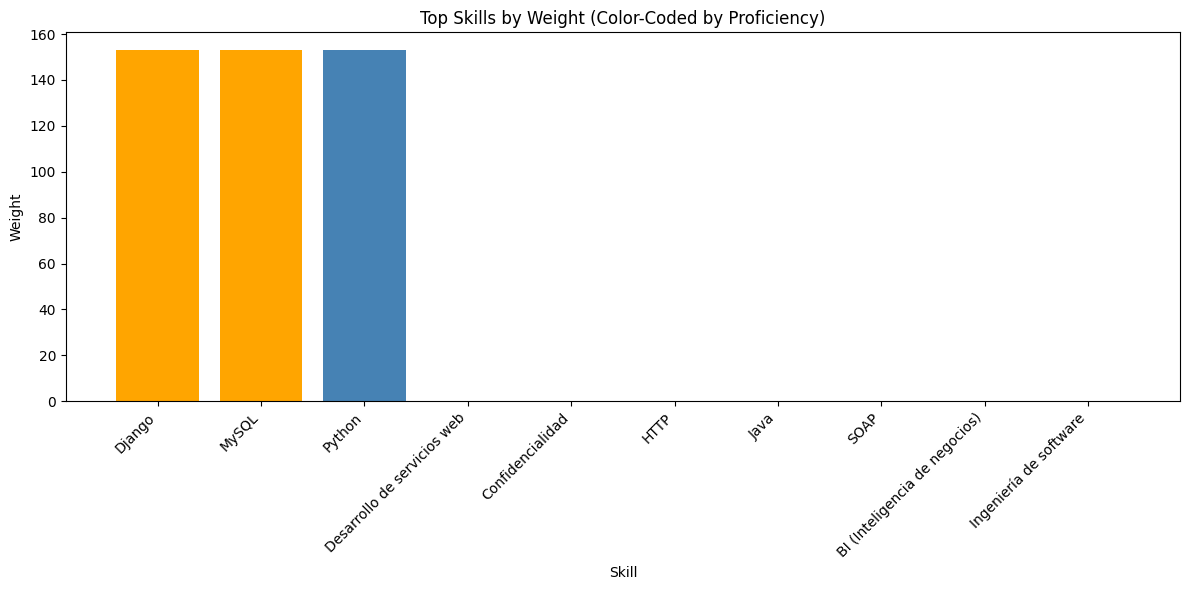

In [ ]:
# Make the bar chart using matplotlib with color-coded proficiency levels

import matplotlib.pyplot as plt

# Color map for proficiency levels
color_map = {
    'expert': '#2E8B57',       # dark green
    'proficient': '#4682B4',   # steel blue
    'novice': '#FFA500',       # orange
}

# Fallback color
default_color = '#A9A9A9'  # dark gray

# Prepare data
df_skills_trimmed = df_skills[["name", "weight", "proficiency"]]
df_sorted = df_skills_trimmed.sort_values(by="weight", ascending=False).head(10)

# Assign colors based on proficiency
bar_colors = [
    color_map.get(level, default_color)
    for level in df_sorted["proficiency"]
]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted["name"], df_sorted["weight"], color=bar_colors)

plt.title("Top Skills by Weight (Color-Coded by Proficiency)")
plt.xlabel("Skill")
plt.ylabel("Weight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In this step, we will give each skill a color and proficiency label. Each skill is marked with the following colors:

| Proficiency Level | Color       |
| ----------------- | ----------- |
| `expert`          | dark green  |
| `proficient`      | medium blue |
| `novice`          | orange      |
| *other/unknown*   | grey        |


In this Bar Chart, only Django, MySQL, and Python are visible but the other skills are not visible. It happens because the weight is zero or empty (so the bar is invisible). Or maybe the proficiency is not recognized (not expert, proficient, or novice) and the weight is 0, so it still doesn't appear even though there is a fallback color.

# "We can make a filter for weights that have more than 0, so we can see the difference"

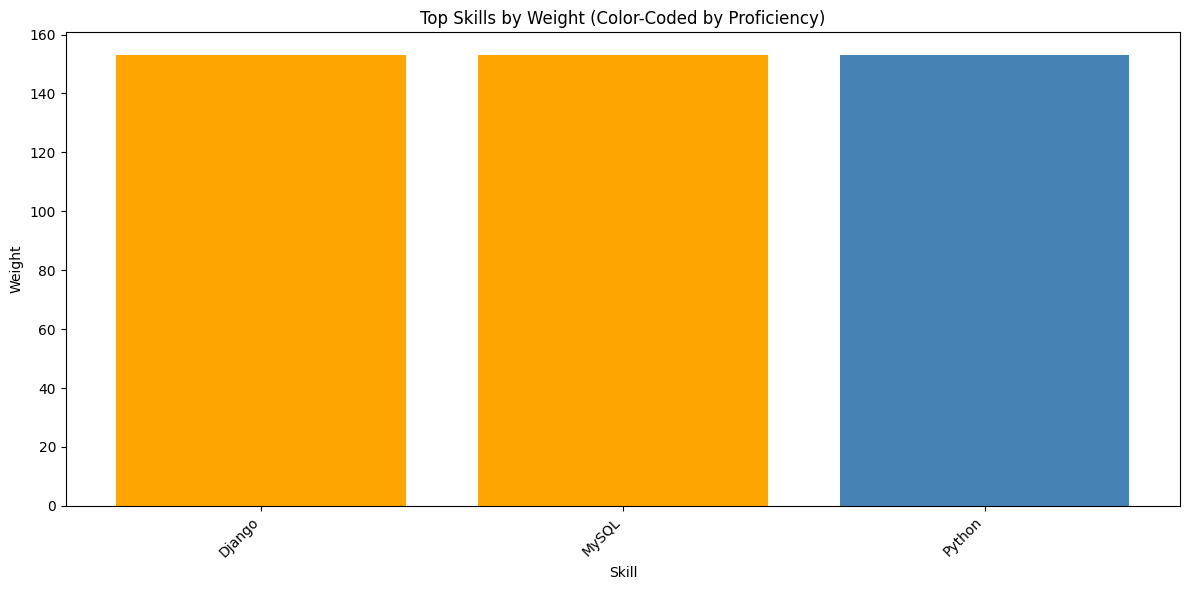

In [ ]:
# Color map for proficiency levels
color_map = {
    'expert': '#2E8B57',       # dark green
    'proficient': '#4682B4',   # steel blue
    'novice': '#FFA500',       # orange
}

# Fallback color
default_color = '#A9A9A9'  # dark gray

# Prepare data (show only the skills that have weight more than zero)
df_skills_trimmed = df_skills[["name", "weight", "proficiency"]]
df_sorted = df_skills_trimmed[df_skills_trimmed["weight"] > 0]
df_sorted = df_sorted.sort_values(by="weight", ascending=False).head(10)

# Assign colors based on proficiency
bar_colors = [
    color_map.get(level, default_color)
    for level in df_sorted["proficiency"]
]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted["name"], df_sorted["weight"], color=bar_colors)

plt.title("Top Skills by Weight (Color-Coded by Proficiency)")
plt.xlabel("Skill")
plt.ylabel("Weight")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Job search integration

We'll build a function to search for jobs based on a keyword (e.g., "python, "data analyst") with filter whther the location is remote or on-site.   

In this case, we are using API of "POST"

After trying the official API and unofficial but publicly access, it didn't work because of authorization.

In [ ]:
# import requests
# import pandas as pd

# Torre job search endpoint (unofficial but publicly accessible)
# url = "https://search.torre.co/opportunities/_search/?offset=0&size=10"

# ---- FILTER SETTINGS ----
# keyword = "python"
# location_filter = "Indonesia"
# company_filter = "Torre"

# ---- FIXED PAYLOAD (remote must be an object, not boolean!)
# payload = {
#    "skill/role": {
#        "text": keyword,
#        "experience": "potential-to-develop"
#    },
#   "remote": {
#        "value": True
#    },
#    "location": {
#        "text": location_filter
#    },
#    "organization": {
#        "term": company_filter
#    }
#}

# Headers
# headers = {
#    "Accept": "application/json",
#    "Content-Type": "application/json"
# }

# ---- SEND REQUEST ----
# response = requests.post(url, headers=headers, json=payload)

# ---- HANDLE RESPONSE ----
# if response.status_code == 200:
#    results = response.json().get("results", [])

    # Extract relevant job data
    # jobs = []
    # for job in results:
    #    jobs.append({
    #        "Job Title": job.get("objective"),
    #        "Company": job.get("organization", {}).get("name", "N/A"),
    #        "Remote": job.get("remote", False),
    #        "Location": job.get("place", {}).get("location", "N/A"),
    #        "Job URL": f"https://torre.co/opportunities/{job.get('id')}"
    #    })

    # Convert to DataFrame and show
    # df_jobs = pd.DataFrame(jobs)
    # display(df_jobs)
# else:
    # print("Error:", response.status_code)
    # print(response.text)


# The output of this cell is > Error: 401
# {"meta":{"message":"Unauthorized access"}}


Error: 401
{"meta":{"message":"Unauthorized access"}}


Instead, we can make the simulated job search

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00


We can use this data that we make ONLY fpr job search integration

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

job_data = [
    {"title": "Python Developer", "company": "Torre AI", "location": "Remote (Global)", "skills": "Python, Django", "remote": True},
    {"title": "Data Analyst", "company": "DataVision", "location": "Indonesia (On-site)", "skills": "SQL, Python", "remote": False},
    {"title": "Frontend Engineer", "company": "TechHub", "location": "Remote (Global)", "skills": "React, JavaScript", "remote": True},
    {"title": "ML Engineer", "company": "AI Corp", "location": "United States (On-site)", "skills": "TensorFlow, Python", "remote": False},
    {"title": "Backend Developer", "company": "Codeify", "location": "Switzerland (Hybrid)", "skills": "Node.js, MongoDB", "remote": True},
    {"title": "AI Researcher", "company": "DeepBrain", "location": "Brazil (Hybrid)", "skills": "Pytorch, NLP", "remote": True},
    {"title": "Product Manager", "company": "CloudWorks", "location": "Remote (Global)", "skills": "Agile, Jira", "remote": True}
]

# Update the DataFrame
df_jobs = pd.DataFrame(job_data)

# Create UI widgets
keyword_input = widgets.Text(description="Keyword:", placeholder="e.g. Python")
location_input = widgets.Dropdown(
    options=["All", "Remote (Global)", "Indonesia (On-site)", "United States (On-site)", "Brazil (Hybrid)", "Switzerland (Hybrid)"],
    value="All",
    description="Location:"
)
remote_toggle = widgets.Checkbox(value=False, description="Remote only")
company_filter = widgets.Text(description="Company:", placeholder="Optional")

search_button = widgets.Button(description="Search Jobs", button_style='success')

# Output area
output = widgets.Output()

# Define search function
def search_jobs(b):
    with output:
        clear_output()
        # Apply filters
        result = df_jobs.copy()

        # Filter by keyword in title or skills
        keyword = keyword_input.value.lower()
        if keyword:
            result = result[
                result['title'].str.lower().str.contains(keyword) |
                result['skills'].str.lower().str.contains(keyword)
            ]

        # Filter by location
        location = location_input.value
        if location != "All":
            result = result[result['location'] == location]

        # Filter by remote only
        if remote_toggle.value:
            result = result[result['remote'] == True]

        # Filter by company
        company = company_filter.value.lower()
        if company:
            result = result[result['company'].str.lower().str.contains(company)]

        if not result.empty:
            display(result.reset_index(drop=True))
        else:
            print("No jobs matched your search filters.")

# Connect button click to search function
search_button.on_click(search_jobs)

# Display the widgets
display(widgets.VBox([
    keyword_input,
    location_input,
    remote_toggle,
    company_filter,
    search_button,
    output
]))


In this step, I built an interactive job search feature where users can filter jobs by keyword (e.g., “Python”) and location type (e.g., ‘Remote’, “Hybrid in Switzerland”, or “Onsite in Indonesia”). While the data here is simulated, the functionality is representative of a real-world filtering system.

What I previously wanted to use:
- Official Torre Job Search API :https://torre.ai/api/entities/_searchStream
- Unofficial Torre Endpoint :https://search.torre.co/opportunities/_search/?offset=0&size=10

Why didn't I use Torre's real job API?
Official API (_searchStream):  
- This endpoint is designed for stream-based entity searches but lacks detailed documentation for constructing job-specific queries.  
- It returns errors or no useful data without a well-formed payload structure that is not clearly documented.

Unofficial API (/opportunities/_search/):  
This endpoint Error: 401
{"meta":{"message": "Unauthorized access"}} indicates that it requires authorization or needs to be logged in, so it cannot be used.

## Job recommendations based on genome/skills

In this step, we compare the user's skills from their Torre genome profile with the skill requirements listed in various job postings. For each job, we calculate how many of the required skills match the user's skills, and then rank the jobs based on the total number of matches.

The results are displayed in a clear, easy-to-read table format so users can quickly see which roles best match their strengths. This step shows how we can use simple back-end logic to support personalized job discovery and present the results clearly on the front end.

In [ ]:
import pandas as pd

# Username
username = "lizardoestebanperdomocarrera"

# Extract user skills from genome result
user_skills = [skill['name'].lower() for skill in skills_data if isinstance(skill, dict)]

# Sample job dataset (used earlier in Step 7)
job_data = [
    {"title": "Python Developer", "company": "Torre AI", "skills": "Python, Django"},
    {"title": "Data Analyst", "company": "DataVision", "skills": "Python, SQL"},
    {"title": "Frontend Engineer", "company": "TechHub", "skills": "React, JavaScript"},
    {"title": "ML Engineer", "company": "AI Corp", "skills": "TensorFlow, Python"},
    {"title": "Backend Developer", "company": "Codeify", "skills": "Node.js, MongoDB"},
    {"title": "AI Researcher", "company": "DeepBrain", "skills": "PyTorch, R"},
    {"title": "Product Manager", "company": "CloudWorks", "skills": "Agile, Scrum"}
]

# Convert to DataFrame
df_jobs = pd.DataFrame(job_data)

# Normalize job skill strings into list of lowercase skills
def normalize_skills(skills_string):
    return [skill.strip().lower() for skill in skills_string.split(",")]

# Add normalized skills and compute match score
df_jobs['job_skills'] = df_jobs['skills'].apply(normalize_skills)
df_jobs['match_score'] = df_jobs['job_skills'].apply(
    lambda job_skills: len(set(job_skills).intersection(set(user_skills)))
)

# Sort jobs by how many skills match
recommended_jobs = df_jobs.sort_values(by='match_score', ascending=False)

# Display as a table for convenience
display(recommended_jobs[['title', 'company', 'skills', 'match_score']].reset_index(drop=True))


,title,company,skills,match_score
0,Python Developer,Torre AI,"Python, Django",2
1,Data Analyst,DataVision,"Python, SQL",2
2,ML Engineer,AI Corp,"TensorFlow, Python",1
3,Backend Developer,Codeify,"Node.js, MongoDB",1
4,Frontend Engineer,TechHub,"React, JavaScript",0
5,AI Researcher,DeepBrain,"PyTorch, R",0
6,Product Manager,CloudWorks,"Agile, Scrum",0


## Export and save the result!

After generating personalized job recommendations, we provide users the ability to export their matches as a CSV file. This makes it easy to keep records, share with others, or revisit opportunities later.

In [ ]:
# Check available columns
print("Available columns:", recommended_jobs.columns.tolist())

Available columns: ['title', 'company', 'skills', 'job_skills', 'match_score']


In [ ]:
# Export only the available/relevant columns
output_file = "recommended_jobs.csv"

# Use only confirmed columns
recommended_jobs[['title', 'company', 'match_score']].to_csv(output_file, index=False)

# Download the file in Colab
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>